# 优化算法

## 优化和深度学习


### 优化的目标

优化算法的目标函数通常是基于训练数据集的损失函数，优化的目标是减少训练误差。

深度学习（或更广义地说，统计推断）的目标是减少泛化误差。

In [1]:
%matplotlib inline
import numpy as np
import torch
from mpl_toolkits import mplot3d
from d2l import torch as d2l

In [2]:
def f(x):
    return x * torch.cos(np.pi * x)

def g(x):
    return f(x) + 0.2 * torch.cos(5 * np.pi * x)

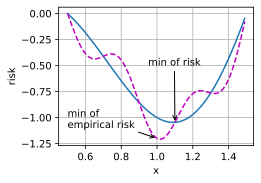

In [3]:
def annotate(text, xy, xytext):  #@save
    d2l.plt.gca().annotate(text, xy=xy, xytext=xytext,
                           arrowprops=dict(arrowstyle='->'))

x = torch.arange(0.5, 1.5, 0.01)
d2l.set_figsize((4.5, 2.5))
d2l.plot(x, [f(x), g(x)], 'x', 'risk')
annotate('min of\nempirical risk', (1.0, -1.2), (0.5, -1.1))
annotate('min of risk', (1.1, -1.05), (0.95, -0.5))

### 深度学习中的优化挑战

局部最小值：当优化问题的数值解接近局部最优值时，随着目标函数解的梯度接近或变为零，通过最终迭代获得的数值解可能仅使目标函数局部最优，而不是全局最优。
鞍点：鞍点（saddle point）是指函数的所有梯度都消失但既不是全局最小值也不是局部最小值的任何位置。
梯度消失：在深度神经网络训练过程中，由于网络层数较多，靠近输入层的梯度值在反向传播过程中逐渐减小，甚至接近于零的现象。

## 凸性

如果算法在凸性条件设定下的效果很差， 那通常我们很难在其他条件下看到好的结果。

### 定义
####  凸集
如果对于任何$a, b \in \mathcal{X}$，连接$a$和$b$的线段也位于$\mathcal{X}$中，则向量空间中的一个集合$\mathcal{X}$是*凸*（convex）的。
在数学术语上，这意味着对于所有$\lambda \in [0, 1]$，我们得到

$$\lambda  a + (1-\lambda)  b \in \mathcal{X} \text{ 当 } a, b \in \mathcal{X}.$$

#### 凸函数
给定一个凸集$\mathcal{X}$，如果对于所有$x, x' \in \mathcal{X}$和所有$\lambda \in [0, 1]$，函数$f: \mathcal{X} \to \mathbb{R}$是凸的，我们可以得到

$$\lambda f(x) + (1-\lambda) f(x') \geq f(\lambda x + (1-\lambda) x').$$

### 凸函数性质
- 凸函数局部极小值是全局极小值
- 凸函数的下水平集是凸的
- 一个二次可微函数是凸函数，当且仅当其Hessian（二阶导数矩阵）是半正定的。


在深度学习的背景下，凸函数的主要目的是帮助我们详细了解优化算法。 

## 梯度下降(Gradient Descent)

梯度下降是一种迭代优化算法，用于寻找目标函数的局部最小值。其核心思想是：在每一步迭代中，沿着目标函数负梯度的方向更新参数，从而不断减小目标函数的值。

学习率的大小很重要：学习率太大会使模型发散，学习率太小会没有进展。

梯度下降会可能陷入局部极小值，而得不到全局最小值。

在高维模型中，调整学习率是很复杂的。

预处理有助于调节比例。
牛顿法在凸问题中一旦开始正常工作，速度就会快得多。

对于非凸问题，不要不作任何调整就使用牛顿法。

##  随机梯度下降(SGD)

随机梯度下降是梯度下降算法的一种变体，它在每次迭代中只使用数据集的一个样本来计算梯度，并通过该样本来更新模型的参数。

##  小批量随机梯度下降（Mini-batch SGD或MB-SGD）
小批量随机梯度下降是在每次迭代中，随机选取一小部分样本（称为“mini-batch”）来计算梯度，并基于这个梯度来更新模型参数。

## 动量法
动量法使用了指数加权移动平均的思想。它将过去时间步的梯度做了加权平均，且权重按时间步指数衰减。

In [ ]:
# 设置动量超参数 momentum
trainer = torch.optim.SGD
d2l.train_concise_ch11(trainer, {'lr': 0.005, 'momentum': 0.9}, data_iter)

## AdaGrad算法

AdaGrad（Adaptive Gradient Algorithm）是一种自适应学习率的梯度优化算法，该算法通过考虑参数梯度的历史信息来自动调整每个参数的学习率，从而优化模型的训练过程。

核心思想是为每个参数维护一个累积梯度平方和，并根据这个累积和来动态调整每个参数的学习率。

### 算法

观察算法轨迹

epoch 20, x1: -2.382563, x2: -0.158591


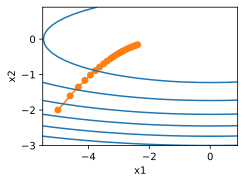

In [5]:
%matplotlib inline
import math
import torch
from d2l import torch as d2l

def adagrad_2d(x1, x2, s1, s2):
    eps = 1e-6
    g1, g2 = 0.2 * x1, 4 * x2
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta = 0.4
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

epoch 20, x1: -0.002295, x2: -0.000000


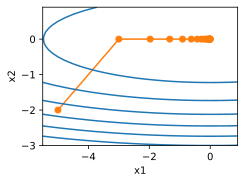

In [7]:
# 学习率提高到2
eta = 2
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

### 从零实现

In [9]:
def init_adagrad_states(feature_dim):
    s_w = torch.zeros((feature_dim, 1))
    s_b = torch.zeros(1)
    return (s_w, s_b)

def adagrad(params, states, hyperparams):
    eps = 1e-6
    for p, s in zip(params, states):
        with torch.no_grad():
            s[:] += torch.square(p.grad)
            p[:] -= hyperparams['lr'] * p.grad / torch.sqrt(s + eps)
        p.grad.data.zero_()

loss: 0.242, 0.710 sec/epoch


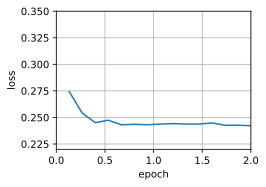

In [10]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adagrad, init_adagrad_states(feature_dim),
               {'lr': 0.1}, data_iter, feature_dim);

In [ ]:
# 框架实现 
trainer = torch.optim.Adagrad
d2l.train_concise_ch11(trainer, {'lr': 0.1}, data_iter)

## RMSProp算法

epoch 20, x1: -0.010599, x2: 0.000000


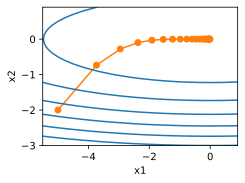

In [11]:
def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1 ** 2
    s2 = gamma * s2 + (1 - gamma) * g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta, gamma = 0.4, 0.9
d2l.show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))

### 实现RMSProp算法

RMSProp算法的核心思想是对每个参数使用不同的学习率，这些学习率是根据参数的最近梯度大小自适应调整的。具体来说，RMSProp使用平方梯度的指数加权移动平均来调整学习率，从而使得学习率的调整更加平滑。


In [12]:
def init_rmsprop_states(feature_dim):
    s_w = torch.zeros((feature_dim, 1))
    s_b = torch.zeros(1)
    return (s_w, s_b)

def rmsprop(params, states, hyperparams):
    gamma, eps = hyperparams['gamma'], 1e-6
    for p, s in zip(params, states):
        with torch.no_grad():
            s[:] = gamma * s + (1 - gamma) * torch.square(p.grad)
            p[:] -= hyperparams['lr'] * p.grad / torch.sqrt(s + eps)
        p.grad.data.zero_()

loss: 0.245, 0.178 sec/epoch


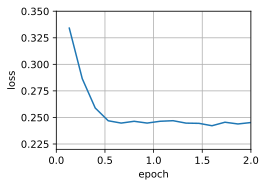

In [13]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(rmsprop, init_rmsprop_states(feature_dim),
               {'lr': 0.01, 'gamma': 0.9}, data_iter, feature_dim);

loss: 0.246, 0.310 sec/epoch


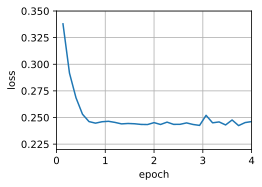

In [14]:
# 框架实现
trainer = torch.optim.RMSprop
d2l.train_concise_ch11(trainer, {'lr': 0.01, 'alpha': 0.9},
                       data_iter)

## Adadelta
Adadelta算法是根据前一次更新时的梯度和参数来自适应地调整学习率。与RMSProp算法类似，Adadelta也利用了梯度平方的指数移动平均来缩放学习率。但不同的是，Adadelta还引入了一个额外的状态变量来存储参数更新差值的平方的指数移动平均，从而进一步改进了学习率的自适应调整。

In [15]:
%matplotlib inline
import torch
from d2l import torch as d2l


def init_adadelta_states(feature_dim):
    s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    delta_w, delta_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    return ((s_w, delta_w), (s_b, delta_b))

def adadelta(params, states, hyperparams):
    rho, eps = hyperparams['rho'], 1e-5
    for p, (s, delta) in zip(params, states):
        with torch.no_grad():
            # In-placeupdatesvia[:]
            s[:] = rho * s + (1 - rho) * torch.square(p.grad)
            g = (torch.sqrt(delta + eps) / torch.sqrt(s + eps)) * p.grad
            p[:] -= g
            delta[:] = rho * delta + (1 - rho) * g * g
        p.grad.data.zero_()

loss: 0.247, 0.205 sec/epoch


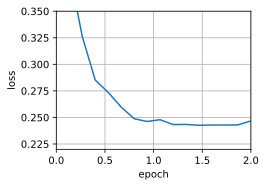

In [16]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adadelta, init_adadelta_states(feature_dim),
               {'rho': 0.9}, data_iter, feature_dim);

loss: 0.243, 0.316 sec/epoch


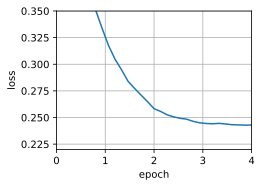

In [17]:
# 框架 
trainer = torch.optim.Adadelta
d2l.train_concise_ch11(trainer, {'rho': 0.9}, data_iter)

## Adam算法

Adam算法结合了动量梯度下降法和RMSProp算法的特点，通过计算梯度的一阶矩估计（即均值）和二阶矩估计（即未中心化的方差）来更新每个参数的学习率。

In [18]:
%matplotlib inline
import torch
from d2l import torch as d2l


def init_adam_states(feature_dim):
    v_w, v_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    return ((v_w, s_w), (v_b, s_b))

def adam(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-6
    for p, (v, s) in zip(params, states):
        with torch.no_grad():
            v[:] = beta1 * v + (1 - beta1) * p.grad
            s[:] = beta2 * s + (1 - beta2) * torch.square(p.grad)
            v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
            s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
            p[:] -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr)
                                                       + eps)
        p.grad.data.zero_()
    hyperparams['t'] += 1

loss: 0.244, 0.245 sec/epoch


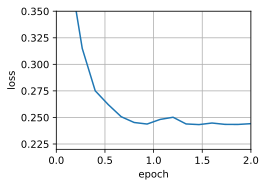

In [19]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adam, init_adam_states(feature_dim),
               {'lr': 0.01, 't': 1}, data_iter, feature_dim);

loss: 0.243, 0.338 sec/epoch


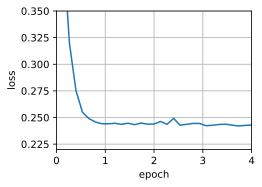

In [20]:
trainer = torch.optim.Adam
d2l.train_concise_ch11(trainer, {'lr': 0.01}, data_iter)

loss: 0.243, 0.307 sec/epoch


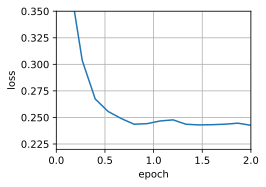

In [21]:
def yogi(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-3
    for p, (v, s) in zip(params, states):
        with torch.no_grad():
            v[:] = beta1 * v + (1 - beta1) * p.grad
            s[:] = s + (1 - beta2) * torch.sign(
                torch.square(p.grad) - s) * torch.square(p.grad)
            v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
            s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
            p[:] -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr)
                                                       + eps)
        p.grad.data.zero_()
    hyperparams['t'] += 1

data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(yogi, init_adam_states(feature_dim),
               {'lr': 0.01, 't': 1}, data_iter, feature_dim);

对于具有显著差异的梯度，adam可能会遇到收敛性问题。我们可以通过使用更大的小批量或者切换到改进的估计值
来修正它们。Yogi提供了这样的替代方案。

## 学习率调度器

在训练期间逐步降低学习率可以提高准确性，并且减少模型的过拟合。
常见的调度器：单因子调度器、多因子调度器、余玄调度器、预热